Let's practice making a simple Kalman filter that can filter noisy sensor measurements!

We'll pretend to be a robot using some noisy sensor to sense its location. The true position of our robot will be given by $x$. The measurements, $z$, are Gaussian random values centered about the actual position $x$ with a variance given by $R$.

In [1]:
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Setup the initial parameters.

In [4]:
#setup initial parameters
n_iter = 100
sz = (n_iter,)	#Size of array
x0 = -0.5	#Initial position value
move = True #Enable or disable random movement
u_const = 0.1


R = 0.1**2 # Estimate of measurement variance
Q = 1.0 #Process variance
T = 0.5 #control input generation variance
U = 0.3 #control input variance

#Create the arrays
x = np.zeros(sz)	# array of actual position values
u = np.zeros(sz)    # array of control inputs
z = np.zeros(sz)	# measurement array


xhat = np.zeros(sz)	# a posteri estimate of x
Vhat = np.zeros(sz)	# a posteri error estimate (variance)
#xhatminus = np.zeros(sz)	# a priori estimate of x
#Vhatminus = np.zeros(sz)	# a priori error estimate (variance)

K = np.zeros(sz)	# Kalman gain or blending factor

# initial guess
xhat[0] = 0.0
#P[0] = 1.0
Vhat[0] = R

# initial position
x[0] = x0

Recursively apply the Kalman filter algorithm

0.502487562189
-0.153, 0.507
0.60119047619
-0.201, 0.605
0.616149153472
-0.164, 0.620
0.61831881328
-0.080, 0.622
0.618631473365
0.011, 0.622
0.618676487206
0.109, 0.622
0.618682966997
0.206, 0.622
0.618683899752
0.302, 0.622
0.618684034021
0.392, 0.622
0.618684053348
0.503, 0.622
0.61868405613
0.600, 0.622
0.618684056531
0.706, 0.622
0.618684056588
0.805, 0.622
0.618684056597
0.903, 0.622
0.618684056598
1.003, 0.622
0.618684056598
1.095, 0.622
0.618684056598
1.207, 0.622
0.618684056598
1.314, 0.622
0.618684056598
1.408, 0.622
0.618684056598
1.507, 0.622
0.618684056598
1.604, 0.622
0.618684056598
1.693, 0.622
0.618684056598
1.786, 0.622
0.618684056598
1.896, 0.622
0.618684056598
1.992, 0.622
0.618684056598
2.109, 0.622
0.618684056598
2.208, 0.622
0.618684056598
2.306, 0.622
0.618684056598
2.398, 0.622
0.618684056598
2.503, 0.622
0.618684056598
2.599, 0.622
0.618684056598
2.695, 0.622
0.618684056598
2.810, 0.622
0.618684056598
2.914, 0.622
0.618684056598
2.997, 0.622
0.618684056598
3.09

<IPython.core.display.Javascript object>


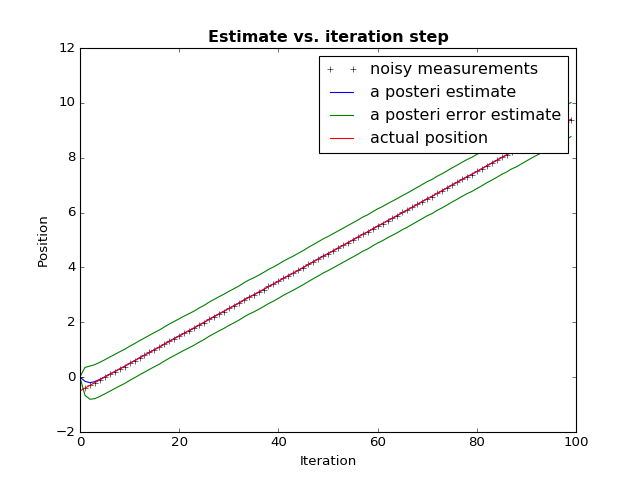

In [6]:
def kalman_filter(mu_minus, var_minus, u, z):
    # calculate the predicted belief
    mu_hat = mu_minus + u
    var_hat = var_minus + R
    
    # calculate the Kalman gain
    K = var_minus/(var_minus + Q)
    print (K)
    # update the belief
    mu_t = mu_hat + K*(z - mu_hat)
    var_t = (1 - K) * var_hat
    
    return mu_t, var_t
    
    
for k in range(1, n_iter):
    # generate a (random) control input
    if move is True:
        #u[k] = np.random.randn()*T
        u[k] = u_const
        #u[k] = np.sin(np.radians(k*2))/10
    
    # move the robot
    x[k] = x[k-1] + u[k]
    
    # generate a sensor measurement about x
    z[k] = np.random.randn()*R + x[k]
    
    #apply the kalman filter
    xhat[k], Vhat[k] = kalman_filter(xhat[k-1], Vhat[k-1] + Q, u[k], z[k])
    print("%1.3f, %1.3f" %(xhat[k], Vhat[k]))

fig = plt.figure()
plt.plot(z, 'k+', label='noisy measurements')
plt.plot(xhat, 'b-', label='a posteri estimate')
plt.plot(xhat + Vhat, 'g-', label = 'a posteri error estimate')
plt.plot(xhat - Vhat, 'g-')
plt.plot(x, 'r-', label='actual position')
#plt.axhline(x, color='g', label = 'truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Position')